In [1]:
!nvidia-smi

Tue Sep 17 14:00:09 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8             12W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
%cd /content/drive/MyDrive/student_resource/Training_01

In [2]:
'''! git clone https://github.com/TheQuanny/Extract-Text-from-images-using-Tesseract-OCR.git'''

'! git clone https://github.com/TheQuanny/Extract-Text-from-images-using-Tesseract-OCR.git'

In [3]:
# Install Tesseract and other dependencies
'''
!apt-get install tesseract-ocr
!apt-get install libtesseract-dev
!pip install pytesseract
'''

'\n!apt-get install tesseract-ocr\n!apt-get install libtesseract-dev\n!pip install pytesseract\n'

In [4]:
# Install pytesseract and Pillow
'''
!apt-get install -y tesseract-ocr
!pip install pytesseract pillow
'''

'\n!apt-get install -y tesseract-ocr\n!pip install pytesseract pillow\n'

In [5]:
!pip install tqdm
# Install Hugging Face transformers
!pip install transformers

In [ ]:
'''
import pytesseract
'''
from PIL import Image
import os
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch

DATASET_FOLDER = '/content/drive/MyDrive/student_resource/dataset/'
train = pd.read_csv(os.path.join(DATASET_FOLDER, 'train_subset.csv'))
test = pd.read_csv(os.path.join(DATASET_FOLDER, 'test.csv'))

In [ ]:
import pytesseract
from PIL import Image
import os
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch
from tqdm import tqdm  # For progress bars

'''
# Function to extract text from an image (CPU-bound)
def extract_text_from_image(image_path):
    try:
        image = Image.open(image_path)
        # Pre-processing: Resize and convert to grayscale for better OCR performance
        # image = image.resize((image.width * 2, image.height * 2))
        image = image.convert("L")

        # Extract text using Tesseract (CPU-bound)
        extracted_text = pytesseract.image_to_string(image, lang='eng', config='--psm 6')

        return extracted_text.strip()

    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Step 1: Extract text from images with a progress bar
image_folder = '/content/drive/MyDrive/student_resource/train_images'
data = []
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif'))]


# Add tqdm to the loop for image processing progress
for filename in tqdm(image_files, desc="Processing Images"):
    image_path = os.path.join(image_folder, filename)
    text = extract_text_from_image(image_path)
    data.append([filename, text])


# Convert to pandas DataFrame
df = pd.DataFrame(data, columns=['Image Name', 'Extracted Text'])
'''

In [ ]:
#import easyocr
#import os
#import pandas as pd
#from tqdm import tqdm

#reader = easyocr.Reader(['en'], gpu=True)

#def extract_text_from_image(image_path):
#    try:
#        result = reader.readtext(image_path, detail=0)
#        return ' '.join(result).strip()
    
#    except Exception as e:
#        print(f"Error processing {image_path}: {e}")
#        return None

#image_folder = '/kaggle/input/test-data/test'

#data = []

#file_list = [filename for filename in os.listdir(image_folder) if filename.endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif'))]
#for filename in tqdm(file_list, desc="Extracting Text", unit="file"):
#    image_path = os.path.join(image_folder, filename)
    
    # Extract text from the image
#    text = extract_text_from_image(image_path)
    
    # Store the image name and extracted text in the data list
#    data.append([filename, text])

# Step 4: Save the extracted data to a CSV file
#df = pd.DataFrame(data, columns=['Image Name', 'Extracted Text'])
#csv_path = '/kaggle/working/extracted_test_text.csv'
#df.to_csv(csv_path, index=False)

#print(f"Extraction completed! The results have been saved to {csv_path}")

In [6]:
!pip install paddlepaddle paddleocr
!python3 -m pip install paddlepaddle-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 1.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 MB 12.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.5/407.5 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 80.7 MB/s eta 0:00:00:00:01
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=d4fd9668b72bb977e63059c2f75b6546d6b2fb9b76a1d27e7a26c1b70104c431
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.9/758.9 MB 1.5 MB/s eta 0:00:0000:0100:08m


In [7]:
import paddle
print(paddle.utils.run_check())

Running verify PaddlePaddle program ... 


I0917 14:05:14.540948    37 program_interpreter.cc:212] New Executor is Running.
W0917 14:05:14.541491    37 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 12.4, Runtime API Version: 11.8
W0917 14:05:14.555991    37 gpu_resources.cc:164] device: 0, cuDNN Version: 9.0.


PaddlePaddle works well on 1 GPU.


I0917 14:05:15.124675    37 interpreter_util.cc:624] Standalone Executor is Used.
======================= Modified FLAGS detected =======================
FLAGS(name='FLAGS_selected_gpus', current_value='1', default_value='')
I0917 14:05:17.178694   163 tcp_utils.cc:107] Retry to connect to 127.0.0.1:54243 while the server is not yet listening.
======================= Modified FLAGS detected =======================
FLAGS(name='FLAGS_selected_gpus', current_value='0', default_value='')
I0917 14:05:17.194788   162 tcp_utils.cc:181] The server starts to listen on IP_ANY:54243
I0917 14:05:17.194998   162 tcp_utils.cc:130] Successfully connected to 127.0.0.1:54243
I0917 14:05:20.178959   163 tcp_utils.cc:130] Successfully connected to 127.0.0.1:54243
I0917 14:05:20.179579   163 process_group_nccl.cc:129] ProcessGroupNCCL pg_timeout_ 1800000
W0917 14:05:20.182587   163 gpu_resources.cc:119] Please NOTE: device: 1, GPU Compute Capability: 7.5, Driver API Version: 12.4, Runtime API Version: 11.

PaddlePaddle works well on 2 GPUs.
PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.
None


I0917 14:05:21.764889   180 tcp_store.cc:289] receive shutdown event and so quit from MasterDaemon run loop


In [ ]:
from paddleocr import PaddleOCR
import cv2
import os
import pandas as pd

# Step 1: Preprocessing function for images with contrast and optional skew correction
def preprocess_image(image_path):
    try:
        image = cv2.imread(image_path)
        # Convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Apply CLAHE for contrast enhancement
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        enhanced_image = clahe.apply(gray)
        # Apply thresholding
        _, thresh = cv2.threshold(enhanced_image, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        # Apply median blur to remove noise
        processed_image = cv2.medianBlur(thresh, 3)
        return processed_image
    except Exception as e:
        print(f"Error in preprocessing image {image_path}: {e}")
        return None

# Initialize PaddleOCR with GPU enabled for both English and Chinese
ocr_paddleocr = PaddleOCR(use_angle_cls=True, lang='ch', use_gpu=True)  # 'use_gpu=True' enables GPU support

# Step 2: Extract text from image using PaddleOCR
def extract_text_paddleocr(image_path):
    try:
        preprocessed_image = preprocess_image(image_path)
        if preprocessed_image is None:
            return ""
        result = ocr_paddleocr.ocr(image_path)
        extracted_text = ' '.join([line[1][0] for line in result[0]])  # Extract the recognized text
        return extracted_text.strip()
    except Exception as e:
        print(f"PaddleOCR extraction failed for {image_path}: {e}")
        return ""

# Step 3: Process already downloaded images and save the extracted text
def process_downloaded_images_paddleocr(image_folder, output_file):
    # Initialize list to store the extracted data
    data = []
    
    # Iterate through all images in the image folder
    for filename in os.listdir(image_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
            image_path = os.path.join(image_folder, filename)
            print(f"Processing {filename}...")
            
            # Extract text from the image
            text = extract_text_paddleocr(image_path)
            
            # Store the image name and extracted text
            data.append([filename, text])
    
    # Save the extracted data to a CSV file
    df = pd.DataFrame(data, columns=['Image Name', 'Extracted Text'])
    df.to_csv(output_file, index=False)
    print(f"Extraction completed! Results saved to {output_file}")

# Usage Example
image_folder = "/kaggle/working/mapped_images"  # Change 'your-image-folder' to the actual folder name where the images are stored
output_file = "/kaggle/working/output_paddleocr1.csv"  # Save the results to the working directory

process_downloaded_images_paddleocr(image_folder, output_file)

In [9]:
import pandas as pd
df=pd.read_csv('/kaggle/input/output-paddleocr/output_paddleocr.csv')
df.head()

,Image Name,Extracted Text
0,918LQehcw0L.jpg,NaN
1,71uOvyb49QL.jpg,EASYGRIP HANDLES Twosturdysofthandlesforgreat ...
2,41DYfchn+tL.jpg,11.8in 11.8in TotalWireLength:5.9ft 31.5in 2.6...
3,51Af472+rEL.jpg,"3"" 5"" UTENSILS 4"""
4,51eDiDl1wcL.jpg,17cm/6.7in 19cm/7.5in 21cm/8.3in


In [10]:
df = df[df['Extracted Text'].isnull()]
df

,Image Name,Extracted Text
0,918LQehcw0L.jpg,NaN
27,81nxURAcPVL.jpg,NaN
53,91TlRMSN0GL.jpg,NaN
63,91J3luA4YJL.jpg,NaN
77,91hVweqIXhL.jpg,NaN
...,...,...
90425,51tktI2kvWS.jpg,NaN
90437,91QSwrUf1ES.jpg,NaN
90488,81pc-QVFvdL.jpg,NaN
90503,81fxETxCXyL.jpg,NaN


In [ ]:
from paddleocr import PaddleOCR
import cv2
import os
import pandas as pd

# Step 1: Preprocessing function for images with contrast and optional skew correction
def preprocess_image(image_path):
    try:
        image = cv2.imread(image_path)
        # Convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Apply CLAHE for contrast enhancement
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        enhanced_image = clahe.apply(gray)
        # Apply thresholding
        _, thresh = cv2.threshold(enhanced_image, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        # Apply median blur to remove noise
        processed_image = cv2.medianBlur(thresh, 3)
        return processed_image
    except Exception as e:
        print(f"Error in preprocessing image {image_path}: {e}")
        return None

# Initialize PaddleOCR with GPU enabled for both English and Chinese
ocr_paddleocr = PaddleOCR(use_angle_cls=True, lang='ch', use_gpu=True)  # 'use_gpu=True' enables GPU support

# Step 2: Extract text from image using PaddleOCR
def extract_text_paddleocr(image_path):
    try:
        preprocessed_image = preprocess_image(image_path)
        if preprocessed_image is None:
            return ""
        result = ocr_paddleocr.ocr(image_path)
        extracted_text = ' '.join([line[1][0] for line in result[0]])  # Extract the recognized text
        return extracted_text.strip()
    except Exception as e:
        print(f"PaddleOCR extraction failed for {image_path}: {e}")
        return ""

# Step 3: Process already downloaded images and save the extracted text
def process_downloaded_images_paddleocr(image_folder, output_file):
    # Initialize list to store the extracted data
    data = []
    
    # Iterate through all images in the image folder
    for filename in os.listdir(image_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
            image_path = os.path.join(image_folder, filename)
            print(f"Processing {filename}...")
            
            # Extract text from the image
            text = extract_text_paddleocr(image_path)
            
            # Store the image name and extracted text
            data.append([filename, text])
    
    # Save the extracted data to a CSV file
    df = pd.DataFrame(data, columns=['Image Name', 'Extracted Text'])
    df.to_csv(output_file, index=False)
    print(f"Extraction completed! Results saved to {output_file}")

# Usage Example
image_folder = "/kaggle/working/mapped_images"  # Change 'your-image-folder' to the actual folder name where the images are stored
output_file = "/kaggle/working/output_paddleocr1.csv"  # Save the results to the working directory

process_downloaded_images_paddleocr(image_folder, output_file)

In [11]:
pd.read_csv('/kaggle/input/output/output_paddleocr1.csv')

,Image Name,Extracted Text
0,51tktI2kvWS.jpg,NaN
1,81JZKnGGqSL.jpg,NaN
2,81gHYoNY1CL.jpg,NaN
3,51K1EAm6TTL.jpg,NaN
4,81cNTKGK4cL.jpg,NaN
...,...,...
1883,81ZRMPifIeL.jpg,NaN
1884,81L9IBbBE9L.jpg,NaN
1885,81a-A4J86ML.jpg,NaN
1886,81mTbidHkWL.jpg,NaN


In [ ]:
# Step 2: Encode the extracted text using BERT on GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load BERT model and tokenizer (use GPU)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased').to(device)

# Function to get BERT embeddings (GPU-accelerated)
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).cpu().numpy()  # Return embedding as numpy array on CPU

# List to store BERT embeddings
bert_embeddings = []

for text in df['Extracted Text']:
    if text:
        embedding = get_bert_embedding(text)
        bert_embeddings.append(embedding)
    else:
        bert_embeddings.append(None)

# Add BERT embeddings to DataFrame
df['BERT Embedding'] = bert_embeddings

In [ ]:
# Save the extracted text and embeddings to a CSV file
csv_path = '/content/drive/MyDrive/student_resource/train_extracted_text_with_embeddings.csv'
df.to_csv(csv_path, index=False)

print(f"Extraction and BERT encoding completed! The results have been saved to {csv_path}")

In [ ]:
import pandas as pd
import os

# Load the dataset (assuming it's a CSV)
train_subset = pd.read_csv('/content/drive/MyDrive/student_resource/dataset/train_subset.csv')  # Replace with your dataset path

# Extract the image name from the URL
train_subset['image_name'] = train_subset['image_link'].apply(lambda x: x.split('/')[-1].split('.')[0])

# Path to the unzipped images folder
image_folder_path = '/content/drive/MyDrive/student_resource/train_images'  # Path where the images are extracted

# Function to check if the image exists and return the file path
def get_image_path(image_name):
    image_file = f"{image_name}.jpg"
    image_path = os.path.join(image_folder_path, image_file)
    if os.path.exists(image_path):
        return image_path
    return None

# Add the image file paths to the dataframe
train_subset['image_file'] = train_subset['image_name'].apply(get_image_path)

# Filter out rows where the image file is not found
df_filtered = train_subset.dropna(subset=['image_file'])

# Select only the required columns
final_df = df_filtered[['image_file', 'group_id', 'entity_name', 'entity_value']]

# Save the final dataset to a new CSV (or another format of your choice)
final_df.to_csv('/content/drive/MyDrive/student_resource/dataset/train_subset_dataset.csv', index=False)

# Optionally, save the images to a new location or process them further.

In [ ]:

# Step 4: Save the extracted data to a CSV file
train['Image Name'] = data['Image Name']
train['Extracted Text'] = data['Extracted Text']
csv_path = '/content/drive/MyDrive/student_resource/dataset/train_subset.csv'
df.to_csv(csv_path, index=False)

print(f"Extraction completed! The results have been saved to {csv_path}")

In [ ]:
df_filtered

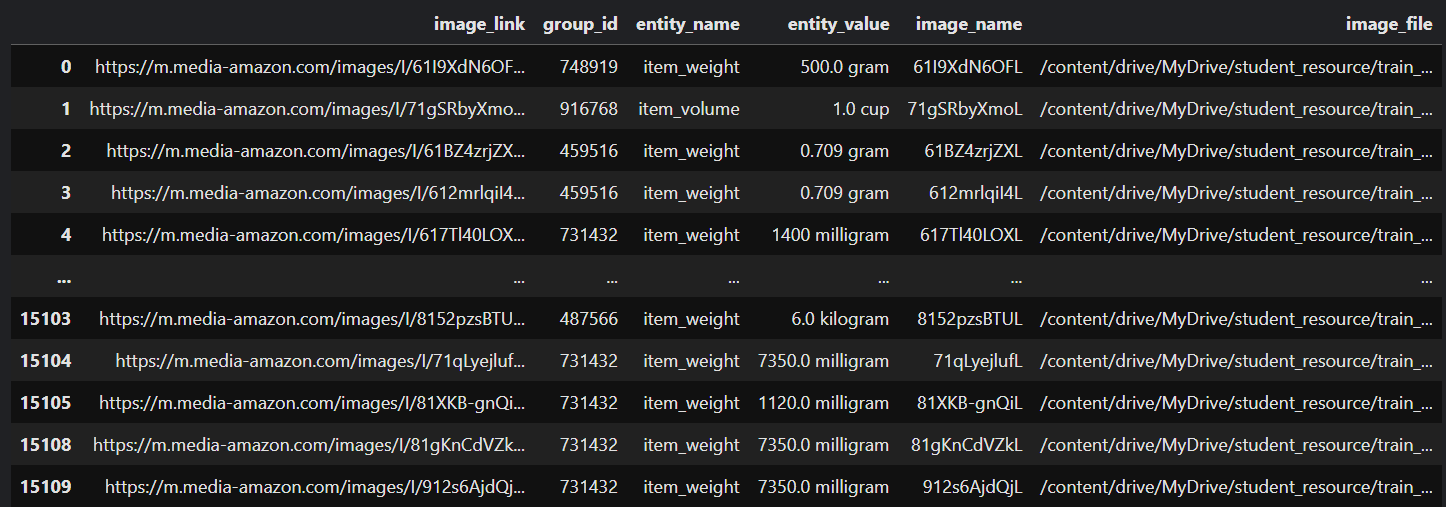

In [ ]:
import pandas as pd
import numpy as np
import regex as re
df_train=pd.read_csv("/content/drive/MyDrive/student_resource/Training_01/final_training_dataset.csv")
df_test=pd.read_csv('/content/drive/MyDrive/student_resource/Training_01/full_test.csv')

In [ ]:
# Preprocess text to clean it and ensure it's a string
def cleaning(text):
    if isinstance(text, str):
        text = text.replace('[', '').replace(']', '').replace("'", '')
        text=text.encode('ascii',errors='ignore').decode()
        text=text.replace('\n','')
        text=text.replace('\t','')
        text=text.replace('/r','')
        text=text.replace('/','')
        text=text.replace('(','')
        text=text.replace(')','')
        text=text.replace('?','')
        text=text.replace('!','')
        text=text.replace('@','')
        text=text.replace('<','')
        text=text.replace('>','')

        return text
    return ''  # Return an empty string if the input is not a string (e.g., NaN or None)

# Apply text cleaning to the DataFrame
df_train['Extracted Text'] = df_train['Extracted Text'].apply(cleaning)

In [ ]:
# Apply text cleaning to the DataFrame
df_test['Extracted Text'] = df_test['Extracted Text'].apply(cleaning)

df_train['training_input'] = df_train[['entity_name','Extracted Text']].agg(' | '.join, axis=1)
df_test['training_input'] = df_test[['entity_name','Extracted Text']].agg(' | '.join, axis=1)

In [ ]:
# target variable 'entity_value'
# training input
import torch
from transformers import BartTokenizer, BartForConditionalGeneration
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration
from sklearn.model_selection import train_test_split

# Initialize the tokenizer and model
tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
model = BartForConditionalGeneration.from_pretrained('facebook/bart-base')

# Example data
X = df_train['training_input']
y = df_train['entity_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.25, shuffle=True)

def tokenize_function(text_list):
    return tokenizer(text_list, return_tensors="pt", padding=True, truncation=True, max_length=512)

input_tokens = [tokenize_function(x)['input_ids'].squeeze(0) for x in X_train]
target_tokens = [tokenize_function(y)['input_ids'].squeeze(0) for y in y_train]

In [ ]:
import torch
from torch.nn.utils.rnn import pad_sequence
from tqdm import tqdm

# Set the model to train mode
model.train()

# Send model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)  # Adjust learning rate if necessary

# Convert tokenized data to tensors and move to GPU
input_tokens = [x.to(device) for x in input_tokens]
target_tokens = [y.to(device) for y in target_tokens]

# Define a basic training loop
epochs = 20  # Adjust based on your needs
batch_size = 8  # Adjust batch size for performance

for epoch in range(epochs):
    total_loss = 0
    print(f'Epoch {epoch + 1}/{epochs}')

    # Create a tqdm progress bar for the batch loop
    for i in tqdm(range(0, len(input_tokens), batch_size), desc="Training Progress", unit="batch"):
        # Prepare inputs and targets batch with padding
        inputs_batch = pad_sequence(input_tokens[i:i + batch_size], batch_first=True, padding_value=tokenizer.pad_token_id)
        targets_batch = pad_sequence(target_tokens[i:i + batch_size], batch_first=True, padding_value=tokenizer.pad_token_id)

        optimizer.zero_grad()

        # Forward pass: get model predictions
        outputs = model(input_ids=inputs_batch, labels=targets_batch)

        # Loss is calculated automatically by model (cross-entropy)
        loss = outputs.loss
        total_loss += loss.item()

        # Backward pass: compute gradients and update weights
        loss.backward()
        optimizer.step()

    # Display the average loss for this epoch
    print(f'Epoch {epoch + 1} completed. Average Loss: {total_loss / len(input_tokens)}')

print("Training complete")

Evaluating: 100%|██████████| 162/162 [00:50<00:00,  3.22it/s]Predicted: 400.0 gram, Actual: 31.0 gram

BLEU score for sample 0: 0.0675

Predicted: 2.5 inch, Actual: 3.0 foot

BLEU score for sample 1: 0.0000

Predicted: 23.0 centimetre, Actual: 23.0 centimetre

BLEU score for sample 2: 0.2214

Predicted: [85.0, 265.0] volt, Actual: [85.0, 265.0] volt

BLEU score for sample 3: 0.5757

Predicted: 12.5 centimetre, Actual: 135.0 centimetre

BLEU score for sample 4: 0.0675

Exact Match Accuracy: 41.11%

Average BLEU Score: 0.1292

In [ ]:
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from torch.nn.utils.rnn import pad_sequence
from tqdm import tqdm
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Set the model to evaluation mode
model.eval()

# Prepare test inputs
input_tokens_test = [tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)['input_ids'].squeeze(0).to(device) for text in X_test]

# Initialize lists to store predicted and actual values
predicted_values = []
actual_values = list(y_test)  # Actual alphanumeric values for comparison

# Batch size for evaluation
batch_size = 8

# BLEU smoothing function
smooth_fn = SmoothingFunction().method4  # Handles cases where there is no overlap in n-grams

# Initialize variables for BLEU and accuracy
total_bleu_score = 0
correct_predictions = 0

# Loop through test data in batches
for i in tqdm(range(0, len(input_tokens_test), batch_size), desc="Evaluating"):
    inputs_batch = pad_sequence(input_tokens_test[i:i + batch_size], batch_first=True, padding_value=tokenizer.pad_token_id)

    # Generate predictions
    with torch.no_grad():
        generated_ids = model.generate(inputs_batch, max_length=20)

    # Decode predictions to text
    for idx, generated_id in enumerate(generated_ids):
        generated_text = tokenizer.decode(generated_id, skip_special_tokens=True)
        predicted_values.append(generated_text)

        # Calculate BLEU score for this prediction (reference is the actual value from y_test)
        actual_text = actual_values[i + idx]
        reference = [actual_text.split()]  # BLEU expects a list of reference sentences (each as a list of words)
        candidate = generated_text.split()  # Candidate translation

        # Calculate BLEU score for this sample
        bleu_score = sentence_bleu(reference, candidate, smoothing_function=smooth_fn)
        total_bleu_score += bleu_score

        # Simple exact match comparison
        if generated_text == actual_text:
            correct_predictions += 1

# Compute average BLEU score and accuracy
average_bleu_score = total_bleu_score / len(predicted_values)
accuracy = correct_predictions / len(predicted_values)

# Print a few examples with BLEU scores
for i in range(10):
    print(f"Predicted: {predicted_values[i]}, Actual: {actual_values[i]}")
    reference = [actual_values[i].split()]
    candidate = predicted_values[i].split()
    sample_bleu = sentence_bleu(reference, candidate, smoothing_function=smooth_fn)
    print(f"BLEU score for sample {i}: {sample_bleu:.4f}")

# Print final evaluation metrics
print(f"\nExact Match Accuracy: {accuracy * 100:.2f}%")
print(f"Average BLEU Score: {average_bleu_score:.4f}")

Evaluating: 100%|██████████| 228/228 [01:02<00:00,  3.63it/s]
Predicted: 50.0 watt, Actual: 250.0 watt

BLEU score for sample 0: 0.0675

Predicted: 4.0 fluid ounce, Actual: 80.0 millilitre

BLEU score for sample 1: 0.0000

Predicted: 2.1 kilogram, Actual: 2.1 kilogram

BLEU score for sample 2: 0.2214

Predicted: 1000.0 millilitre, Actual: 1000.0 millilitre

BLEU score for sample 3: 0.2214

Predicted: 400.0 gram, Actual: 2.0 gram

BLEU score for sample 4: 0.0675

Predicted: 2.0 pound, Actual: 907.2 gram

BLEU score for sample 5: 0.0000

Predicted: 176.0 pound, Actual: 176.0 pound

BLEU score for sample 6: 0.2214

Predicted: 6.2 inch, Actual: 0.4 inch

BLEU score for sample 7: 0.0675

Predicted: 46 gram, Actual: 40 gram

BLEU score for sample 8: 0.0675

Predicted: 563.0 gram, Actual: 563.0 gram

BLEU score for sample 9: 0.2214



Exact Match Accuracy: 39.64%

Average BLEU Score: 0.1249

In [ ]:
# Specify the directory where you want to save the model
save_directory = "/content/drive/MyDrive/Training_01/bert_model_2"

# Save the model
model.save_pretrained(save_directory)

# Save the tokenizer
tokenizer.save_pretrained(save_directory)

print(f"Model and tokenizer saved in {save_directory}")

In [ ]:
from transformers import GenerationConfig

# Define your generation configuration
gen_config = GenerationConfig(
    early_stopping=True,
    num_beams=4,
    no_repeat_ngram_size=3,
    forced_bos_token_id=0,
    forced_eos_token_id=2
)

# Save the generation configuration
gen_config.save_pretrained(save_directory)

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration, GenerationConfig
import torch
from torch.cuda.amp import autocast
from tqdm import tqdm

# Load the saved model and tokenizer
save_directory = "/content/drive/MyDrive/student_resource/Training_01/bert_model_2"
model = BartForConditionalGeneration.from_pretrained(save_directory)
tokenizer = BartTokenizer.from_pretrained(save_directory)
gen_config = GenerationConfig.from_pretrained(save_directory)

print('Model and tokenizer loaded successfully')

# Ensure model is in evaluation mode
model.eval()

# Move the model to the appropriate device (GPU/CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Test the model on df_test
test_texts = df_test['training_input']  # Assuming your input text is in 'training_input'

# Prepare a list to hold generated outputs
generated_outputs = []

# Set batch size for faster processing
batch_size = 32  # Adjust based on available memory

# Iterate over the test set in batches using tqdm progress bar
for i in tqdm(range(0, len(test_texts), batch_size), desc="Generating Batches"):
    # Tokenize inputs for the batch
    texts_batch = test_texts[i:i + batch_size].tolist()
    inputs = tokenizer(texts_batch, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)

    # Generate outputs using mixed precision and top-k sampling
    with autocast():  # Use FP16 precision
        generated_ids = model.generate(
            inputs['input_ids'],
            generation_config=gen_config,
            max_length=50,   # Reduce max length if outputs are shorter
            do_sample=True,  # Enables sampling
            top_k=50,        # Top-k sampling for faster generation
            top_p=0.95,      # Nucleus sampling
            early_stopping=True,
            decoder_start_token_id=model.config.decoder_start_token_id
        )

    # Decode the generated tokens to text and append them to the output list
    for output in generated_ids:
        generated_text = tokenizer.decode(output, skip_special_tokens=True)
        generated_outputs.append(generated_text)

# Add the generated text to the DataFrame for comparison
df_test['entity_value'] = generated_outputs

# You can now save or inspect df_test with the generated outputs
print(df_test[['training_input', 'entity_value']])


In [ ]:
df_test.to_csv('/content/drive/MyDrive/student_resource/Training_01/final_test_dataset_output.csv', index=False)

In [12]:
df=pd.read_csv('/kaggle/input/final-output/final_test_dataset_output.csv')
df.head()

,Image Name,Extracted Text,index,image_link,group_id,entity_name,training_input,entity_value
0,918LQehcw0L.jpg,NaN,130430,https://m.media-amazon.com/images/I/918LQehcw0...,279307,item_weight,item_weight |,180.0 gram r J con+ im g o66666666 sur Su- IP
1,71uOvyb49QL.jpg,EASYGRIP HANDLES Twosturdysofthandlesforgreat ...,124590,https://m.media-amazon.com/images/I/71uOvyb49Q...,603688,item_weight,item_weight | EASYGRIP HANDLES Twosturdysoftha...,150.0 pound r- J o IPig PRE im LOLIM +
2,71uOvyb49QL.jpg,EASYGRIP HANDLES Twosturdysofthandlesforgreat ...,124591,https://m.media-amazon.com/images/I/71uOvyb49Q...,603688,maximum_weight_recommendation,maximum_weight_recommendation | EASYGRIP HANDL...,"150.0 pound r J- o im "" l PRE66666666 IMPIM+"
3,41DYfchn+tL.jpg,11.8in 11.8in TotalWireLength:5.9ft 31.5in 2.6...,5568,https://m.media-amazon.com/images/I/41DYfchn+t...,641642,voltage,voltage | 11.8in 11.8in TotalWireLength:5.9ft ...,"12.0 volt- im l r oIM "" g + J PRE O"
4,41DYfchn+tL.jpg,11.8in 11.8in TotalWireLength:5.9ft 31.5in 2.6...,5569,https://m.media-amazon.com/images/I/41DYfchn+t...,641642,item_weight,item_weight | 11.8in 11.8in TotalWireLength:5....,5.9 pound im PRE o r- con J O OUT sur prevent6...


In [13]:
df_filtered = df[['group_id', 'entity_value']]
df_filtered.head()

,group_id,entity_value
0,279307,180.0 gram r J con+ im g o66666666 sur Su- IP
1,603688,150.0 pound r- J o IPig PRE im LOLIM +
2,603688,"150.0 pound r J- o im "" l PRE66666666 IMPIM+"
3,641642,"12.0 volt- im l r oIM "" g + J PRE O"
4,641642,5.9 pound im PRE o r- con J O OUT sur prevent6...


In [14]:
import pandas as pd
import re

df =df_filtered 
def extract_number_and_unit(value):
    # This regex will capture numbers (with optional decimals) followed by a unit (one or more alphabetic characters)
    match = re.search(r'(\d+\.?\d*)\s*([a-zA-Z]+)', str(value))
    if match:
        return f"{match.group(1)} {match.group(2)}"
    return None

df['cleaned_entity_value'] = df['entity_value'].apply(extract_number_and_unit)
df.to_csv('cleaned_dataset.csv', index=False)
df

,group_id,entity_value,cleaned_entity_value
0,279307,180.0 gram r J con+ im g o66666666 sur Su- IP,180.0 gram
1,603688,150.0 pound r- J o IPig PRE im LOLIM +,150.0 pound
2,603688,"150.0 pound r J- o im "" l PRE66666666 IMPIM+",150.0 pound
3,641642,"12.0 volt- im l r oIM "" g + J PRE O",12.0 volt
4,641642,5.9 pound im PRE o r- con J O OUT sur prevent6...,5.9 pound
...,...,...,...
131182,983323,"1.8 watt im r PRE- sur "" J IP o66666666 con+",1.8 watt
131183,983323,12.0 volt o r J im- sur PRE con del CAP IP g66...,12.0 volt
131184,344790,"400.0 pound o r "" PRE im g J immun- OUT IP""666...",400.0 pound
131185,553707,6.0 pound- r o J im IP O sur con L PRE OL,6.0 pound


In [15]:
final_df=df[['group_id', 'cleaned_entity_value']]

final_df.rename(columns={'cleaned_entity_value': 'prediction'}, inplace=True)
final_df.rename(columns={'group_id': 'index'}, inplace=True)
final_df

/tmp/ipykernel_37/2341839033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.rename(columns={'cleaned_entity_value': 'prediction'}, inplace=True)
/tmp/ipykernel_37/2341839033.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.rename(columns={'group_id': 'index'}, inplace=True)


,index,prediction
0,279307,180.0 gram
1,603688,150.0 pound
2,603688,150.0 pound
3,641642,12.0 volt
4,641642,5.9 pound
...,...,...
131182,983323,1.8 watt
131183,983323,12.0 volt
131184,344790,400.0 pound
131185,553707,6.0 pound


In [ ]:
import pandas as pd
from fuzzywuzzy import process

# Sample entity_unit_map and allowed_units
entity_unit_map = {
    'width': {'centimetre', 'foot', 'inch', 'metre', 'millimetre', 'yard'},
    'depth': {'centimetre', 'foot', 'inch', 'metre', 'millimetre', 'yard'},
    'height': {'centimetre', 'foot', 'inch', 'metre', 'millimetre', 'yard'},
    'item_weight': {'gram', 'kilogram', 'microgram', 'milligram', 'ounce', 'pound', 'ton'},
    'maximum_weight_recommendation': {'gram', 'kilogram', 'microgram', 'milligram', 'ounce', 'pound', 'ton'},
    'voltage': {'kilovolt', 'millivolt', 'volt'},
    'wattage': {'kilowatt', 'watt'},
    'item_volume': {'centilitre', 'cubic foot', 'cubic inch', 'cup', 'decilitre', 'fluid ounce', 'gallon',
                    'imperial gallon', 'litre', 'microlitre', 'millilitre', 'pint', 'quart'}
}

allowed_units = {unit for entity in entity_unit_map for unit in entity_unit_map[entity]}

def correct_spelling(entity_value, allowed_units, threshold=80):
    if pd.isna(entity_value) or entity_value.strip() == "":
        return ""
    
    try:
        value, unit = entity_value.split(maxsplit=1)
    except ValueError:
        return entity_value  # Return as is if split fails

    corrected_unit, score = process.extractOne(unit, allowed_units)

    if score >= threshold:
        return f"{value} {corrected_unit}"
    
    return entity_value

def handle_missing_values(entity_value):
    if pd.isna(entity_value) or entity_value.strip() == "":
        return ""
    return entity_value

df = pd.read_csv('/kaggle/working/final.csv')

df['corrected_entity_value'] = df['entity_value'].apply(lambda x: correct_spelling(x, allowed_units))
df['corrected_entity_value'] = df['corrected_entity_value'].apply(lambda x: handle_missing_values(x))

df.to_csv('corrected_file.csv', index=True)


In [16]:

df=pd.read_csv('/kaggle/input/corrected/corrected_file.csv')
final_df=df[['index', 'prediction']]

final_df.head()

,index,prediction
0,279307,180.0 gram
1,603688,150.0 pound
2,603688,150.0 pound
3,641642,12.0 volt
4,641642,5.9 pound
